In [2]:
import numpy as np
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import keplergl

In [38]:
georgia_tech = (ox.geometries_from_place("Georgia Tech, Atlanta", tags={'building':True})
         .loc[:, ["geometry", "height"]]                 # just keep the geometry column for now
         .query("geometry.type == 'Polygon'")  # only what polygons (buidling footprints)
         .assign(Label="Building Footprints")  # assign a label for later use
         .reset_index(drop=True)               # reset to 0 integer indexing
      )

/var/folders/9t/_sm_x0m957lf5z6q_l21z3dm0000gn/T/ipykernel_22746/4097011282.py:1: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.



In [32]:
georgia_tech

,geometry,height,Label
0,"POLYGON ((-84.39684 33.77804, -84.39684 33.777...",NaN,Building Footprints
1,"POLYGON ((-84.39584 33.77732, -84.39582 33.777...",NaN,Building Footprints
2,"POLYGON ((-84.39748 33.77717, -84.39747 33.777...",NaN,Building Footprints
3,"POLYGON ((-84.39703 33.77691, -84.39703 33.776...",NaN,Building Footprints
4,"POLYGON ((-84.39677 33.77658, -84.39677 33.776...",NaN,Building Footprints
...,...,...,...
283,"POLYGON ((-84.38992 33.77594, -84.38971 33.775...",18,Building Footprints
284,"POLYGON ((-84.39153 33.77092, -84.39153 33.770...",NaN,Building Footprints
285,"POLYGON ((-84.39153 33.77092, -84.39165 33.770...",NaN,Building Footprints
286,"POLYGON ((-84.39524 33.77501, -84.39525 33.775...",NaN,Building Footprints


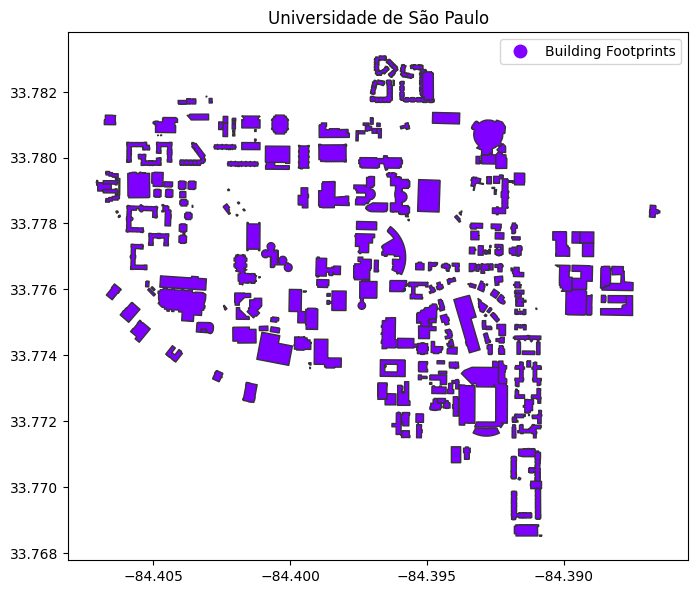

In [25]:
ax = georgia_tech.plot(figsize=(8, 8), column="Label", legend=True,
              edgecolor="0.2", markersize=200, cmap="rainbow")
plt.title("Universidade de São Paulo");

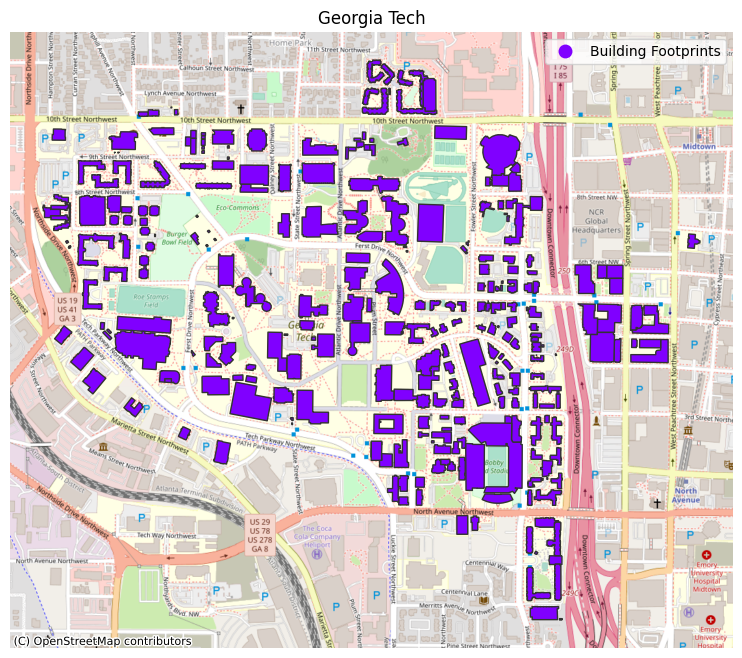

In [16]:
import contextily as ctx

ax = (georgia_tech.to_crs("EPSG:3857")
         .plot(figsize=(10, 8), column="Label", legend=True,
               edgecolor="0.2", markersize=200, cmap="rainbow")
     )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.axis("off")
plt.title("Georgia Tech");

# Interatividade

In [19]:
fig = px.choropleth_mapbox(georgia_tech, geojson=georgia_tech.geometry, locations=georgia_tech.index, color="Label",
                           center={"lat": 33.46, "lon": 84.23}, zoom=12.5,
                           mapbox_style="open-street-map")
fig.update_layout(margin=dict(l=0, r=0, t=30, b=10))

# Mapa de Calor por Área

In [20]:
georgia_tech["Area"] = georgia_tech.to_crs(epsg=3857).area

fig = px.choropleth_mapbox(georgia_tech, geojson=georgia_tech.geometry, locations=georgia_tech.index, color="Area",
                           center={"lat": -23.55, "lon": -46.74}, zoom=12.5,
                           mapbox_style="carto-positron")
fig.update_layout(margin=dict(l=0, r=0, t=30, b=10))

#KeplerGL

In [42]:
georgia_tech = georgia_tech.rename(columns={"height": "Height"})
georgia_tech['Height'] = georgia_tech['Height'].fillna(20)

usp_mapa = keplergl.KeplerGl()
usp_mapa.add_data(data=georgia_tech, name="Building heights")
usp_mapa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Building heights': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…